In [1]:
import cv2,os
import numpy as np
from matplotlib import pyplot as plt

In [51]:
all_files=[]
file_label=[]
load = "./DataOrigin/"

for root,dirs,files in os.walk(load):
    for file_name in files:
        file = os.path.join(root+"/"+file_name)
        label = os.path.join(file_name)
        all_files.append(file)
        file_label.append(label[:5])


all_files.remove("./DataOrigin/1/contrast_1_555_conf_C1-191212_CK2WtCA1_488_CTCF_555_K9Me3.lif - Series002_conf.pxm")
file_label.remove("contr")
all_files.remove("./DataOrigin//.DS_Store")
file_label.remove(".DS_S")

In [53]:
print("len(all_files): ", len(all_files))
print("len(file_label): ", len(file_label))

# for i in all_files:
#     print(i)

len(all_files):  36
len(file_label):  36


./210901SaitosanPictData/4/4_488_STED_decon_C2-191212_CK2KOCA1_488_CTCF_555_K9Me3.lif - Series001_STED_1:2_decon.tif


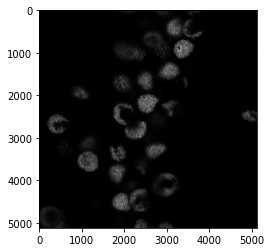

In [46]:
print(all_files[1])
img = cv2.imread(all_files[1])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
def create_gamma_img(gamma, img):
    gamma_cvt = np.zeros((256,1), dtype=np.uint8)
    for i in range(256):
        gamma_cvt[i][0] = 255*(float(i)/255)**(1.0/gamma)
    return cv2.LUT(img, gamma_cvt)

# print(all_files[10])
# img = cv2.imread(all_files[10])

# img_gamma = create_gamma_img(10, img)
# plt.figure(figsize=(10,10))
# # imgs = cv2.hconcat([img, img_gamma])
# plt.imshow(cv2.cvtColor(img_gamma, cv2.COLOR_BGR2RGB))
# plt.show()

In [52]:
from tqdm import tqdm

path="./DataOrigin/1/1_555_STED_C1-191212_CK2WtCA1_488_CTCF_555_K9Me3.lif - Series001_STED.tif"
img = cv2.imread(path)

pixelcount = np.zeros((np.amax(img))+1, dtype=np.int)

for a in tqdm(range(img.shape[0])):
    for b in range(img.shape[1]):
        for c in range(img.shape[2]):
            pixel = img[a][b][c]
            pixelcount[pixel] += 1

print(pixelcount)

100%|██████████| 5120/5120 [01:32<00:00, 55.35it/s]

[68506955  7623469  1985551   406345    84529    22568     7792     3224
     1463      674      302      138       78       44       28       12
        7        7        6        4        0        1        0        2
        0        0        1]


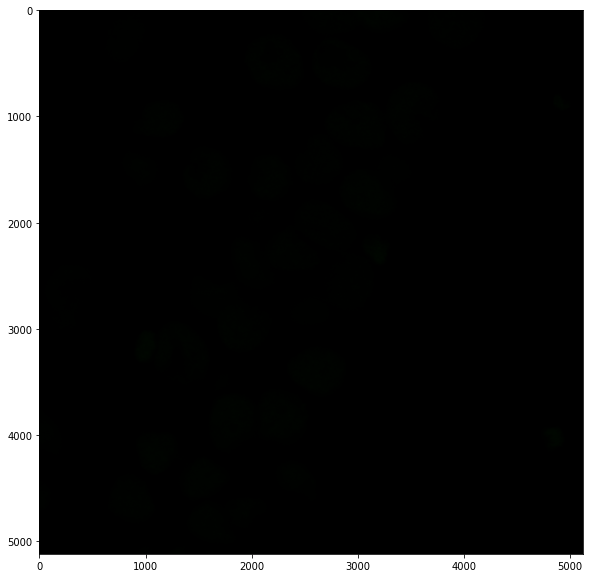

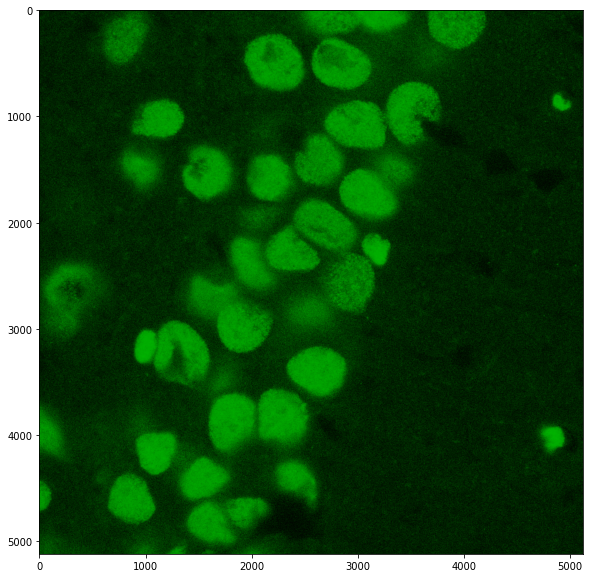

In [7]:
path="./DataOrigin/1/1_488_STED_C2-191212_CK2WtCA1_488_CTCF_555_K9Me3.lif - Series001_STED.tif"
img = cv2.imread(path)


plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

plt.figure(figsize=(10,10))
img_50 = create_gamma_img(10, img)
plt.imshow(cv2.cvtColor(img_50, cv2.COLOR_BGR2RGB))
plt.show()

In [62]:
from tqdm import tqdm

def hist(path):
    img = cv2.imread(path)
    print(path)

    for i in range(3):
        print("channel 0"+str(i)+", max pixel is ", np.amax(img[:,:,i]))
        pixelcount = np.zeros((np.amax(img[:,:,i]))+1, dtype=np.int)
        for a in range(img[:,:,i].shape[0]):
            for b in range(img[:,:,i].shape[1]):
                    pixel = img[a][b][i]
                    pixelcount[pixel] += 1
        print(pixelcount)

In [61]:
for path in all_files:
    hist(path)

# hist = cv2.calcHist(img,[2],None,[256],[0,256])
# plt.figure()
# plt.title("Grayscale Histogram")
# plt.xlabel("Bins")
# plt.ylabel("# of Pixels")
# plt.plot(hist)
# plt.xlim([0,256])
# plt.show()

./DataOrigin/4/4_555_STED_decon_C1-191212_CK2KOCA1_488_CTCF_555_K9Me3.lif - Series001_STED_1:2_decon.tif
channel 00, max pixel is  173
channel 01, max pixel is  173
channel 02, max pixel is  173
./DataOrigin/4/4_488_STED_decon_C2-191212_CK2KOCA1_488_CTCF_555_K9Me3.lif - Series001_STED_1:2_decon.tif
channel 00, max pixel is  255
channel 01, max pixel is  255
channel 02, max pixel is  255
./DataOrigin/4/4_555_conf_C1-191212_CK2KOCA1_488_CTCF_555_K9Me3.lif - Series002_conf.tif
channel 00, max pixel is  0
channel 01, max pixel is  0
channel 02, max pixel is  17
./DataOrigin/4/4_555_STED_C1-191212_CK2KOCA1_488_CTCF_555_K9Me3.lif - Series001_STED.tif
channel 00, max pixel is  0
channel 01, max pixel is  0
channel 02, max pixel is  10
./DataOrigin/4/4_488_conf_C2-191212_CK2KOCA1_488_CTCF_555_K9Me3.lif - Series002_conf.tif
channel 00, max pixel is  0
channel 01, max pixel is  10
channel 02, max pixel is  0
./DataOrigin/4/4_488_STED_C2-191212_CK2KOCA1_488_CTCF_555_K9Me3.lif - Series001_STED.tif

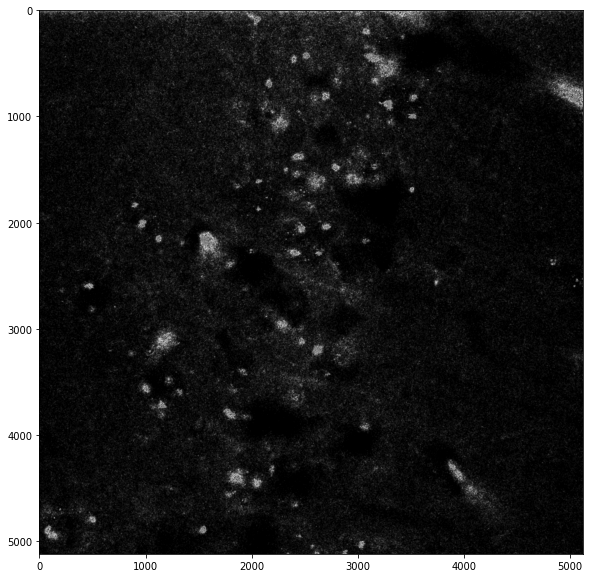

./DataOrigin/4/4_555_STED_decon_C1-191212_CK2KOCA1_488_CTCF_555_K9Me3.lif - Series001_STED_1:2_decon.tif
channel 00, max pixel is  173
[8231358 9056675 4408115 2012932  960679  492236  278152  170920  112734
   79667   59075   45531   36263   30035   25346   21219   18487   15906
   13868   11999   10904    9786    8670    7666    7102    6312    5807
    5337    4916    4598    4184    3863    3637    3446    3225    2898
    2712    2497    2358    2113    2022    1834    1736    1606    1525
    1357    1229    1228    1001     980     882     887     761     778
     704     697     572     609     508     466     451     440     453
     400     376     360     375     305     294     313     294     285
     236     241     195     228     193     205     199     175     161
     155     154     160     162     136     149     141     127     126
     142      89     143     102      83      92      94      87      89
      72      75      80      73      61      61      47      

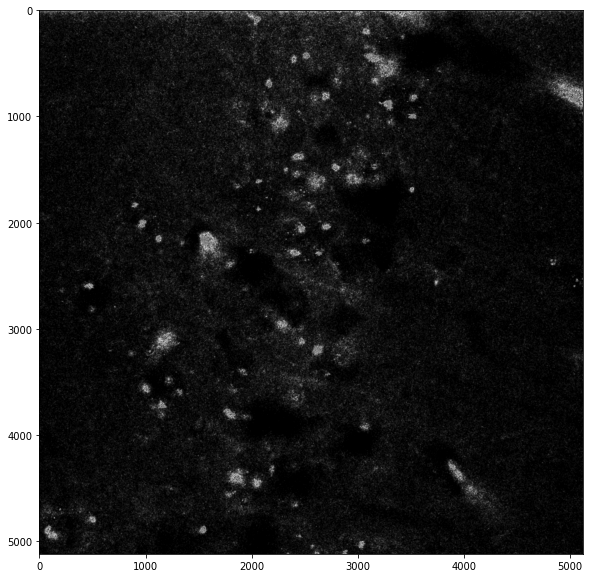

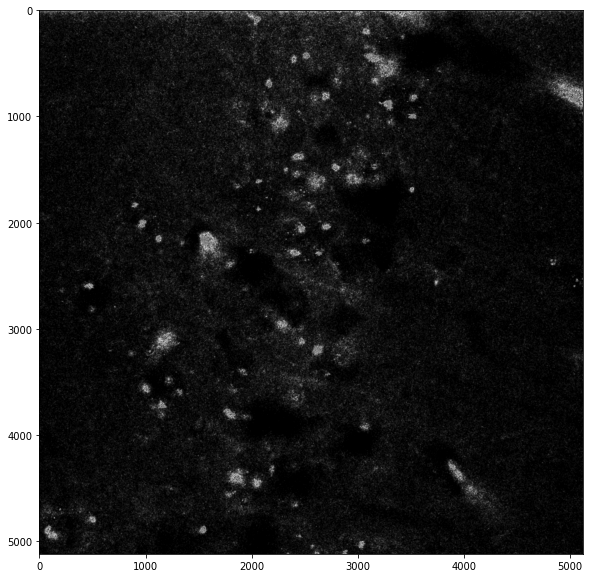

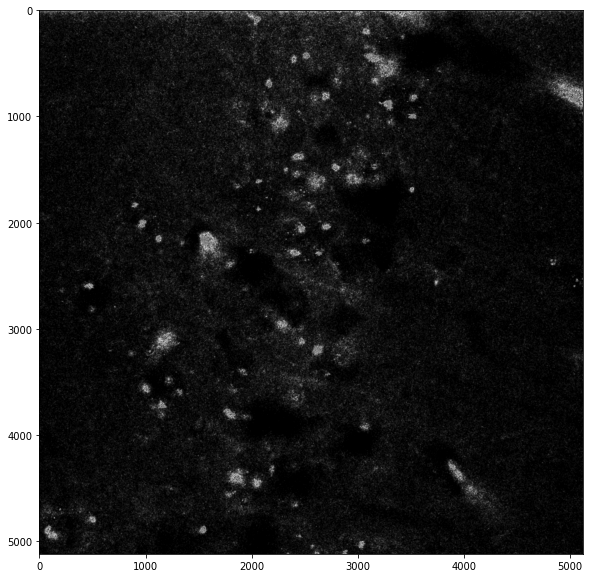

In [63]:
pa = "./DataOrigin/4/4_555_STED_decon_C1-191212_CK2KOCA1_488_CTCF_555_K9Me3.lif - Series001_STED_1:2_decon.tif"
img = cv2.imread(pa)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img*10, cv2.COLOR_BGR2RGB))
plt.show()

hist(pa)

for i in range(3):
    plt.figure(figsize=(10,10))
    plt.imshow(cv2.cvtColor(img[:,:,i]*10, cv2.COLOR_BGR2RGB))
    plt.show()

In [11]:
# path="./DataOrigin/1/1_555_STED_C1-191212_CK2WtCA1_488_CTCF_555_K9Me3.lif - Series001_STED.tif"
img = img_50

sift = cv2.SIFT_create()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #灰度处理图像
kp, des = sift.detectAndCompute(gray,None)   #des是描述子
img_kp = cv2.drawKeypoints(img, kp, gray, color=(255,0,255)) #画出特征点，并显示为红色圆圈
print("len(kp): ", len(kp))

plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(img_kp, cv2.COLOR_BGR2RGB))
plt.show()